# **TECHNOLOGY COMPANIES LAYOFFS (2022 - 2023) EXPLORATORY DATA ANALYSIS.**

![layoff](https://www.genengnews.com/wp-content/uploads/2018/10/July15_2013_33196045_JobCutScissors_15jobcuttingcompanies_II1120923819.jpg)


A layoff is an involuntary separation from work through no fault of employees, often initiated by the employer for economic reasons to cut costs. 
Since the start of mid 2022, a number of companies have conducted massive layoffs affecting a large group of individuals .
### The dataset contains information from 477 Technology companies. 
#### The features are :
1. company - The name of company where layoff took place.
2. total_layoffs - Total number of employees affected by the layoff.
3. 1mpacted_workforce_percentage - Percentage of layoffs expressed as percentage of total workers.
4. reported_date - Date of layoff .
5. industry - Industry where the company operates under.
6. headquarter_location - Headquarters
7. sources - Source of information
8. status - Nature of company (Pubblic or Private)
9. additional_notes - Additional information about the company.

#**1. Data Preprocessing.**

In [149]:
# Importing all the required libraries for the EDA.

from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [150]:
# Reading the layoffs data.

layoffs_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tech_layoffs.csv')

In [151]:
# First 5 rows of the data.

layoffs_data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [152]:
# Size of the dataset.

layoffs_data.shape

(489, 9)

In [153]:
# Summary statistics.

layoffs_data.describe()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
count,489,489,489,489,489,489,489,489,22
unique,477,150,50,187,289,134,221,2,22
top,DataRobot,Unclear,Unclear,1/11/2023,Fintech,San Francisco,TechCrunch,Private,"Per Axios, 22 of the employees laid off were f..."
freq,2,182,133,12,24,136,52,370,1


In [154]:
# Features in the dataset.

layoffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


In [155]:
# Unique values in the industry column.

layoffs_data['industry'].unique()

array(['Fintech, payments', 'Advertising platforms', 'Saas, analytics',
       'fintech, data analytics', 'Health Care', 'Marketing Tech',
       'Cybersecurity', 'food and beverage, e-commerce',
       'telehealth, wellness', 'Beauty tech',
       'productivity, enterprise software', 'Crypto', 'Transportation',
       'Food delivery, ecommerce', 'Logistics', 'Sales Tech',
       'E-commerce', 'Blockchain, cryptocurrency', 'Media, E-commerce',
       'enterprise software, productivity', 'InsurTech', 'video games',
       'Fintech', 'E-commerce, retail', 'Artificial Intelligence',
       'Shipping, Logistics', 'Productivity Tools',
       'Cloud Infrastructure, health care', 'FinTech',
       'Fintech, analytics', 'Robotics', 'fintech, personal finance',
       'Cannabis', 'Video Games, AR', 'Media/entertainment',
       'Media/Entertainment', 'HR Tech', 'Digital media, journalism',
       'marketing, media', 'Health care, predictive analytics',
       'engineering, software', 'SaaS, en

# **2. Data Preparation.**

In [156]:
# Checking any  empty values.

layoffs_data.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

In [157]:
# Dropping the additional_notes column

layoffs_data.drop('additional_notes', axis = 1)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private
...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public


In [158]:
# Checking the data types

layoffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


In [159]:
# Converting the reported_date to date

layoffs_data['reported_date'] = pd.to_datetime(layoffs_data['reported_date'])
layoffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    object        
 2   impacted_workforce_percentage  489 non-null    object        
 3   reported_date                  489 non-null    datetime64[ns]
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   sources                        489 non-null    object        
 7   status                         489 non-null    object        
 8   additional_notes               22 non-null     object        
dtypes: datetime64[ns](1), object(8)
memory usage: 34.5+ KB


# **3. Data Visualization.**

Text(0, 0.5, 'Number of people per layoff.')

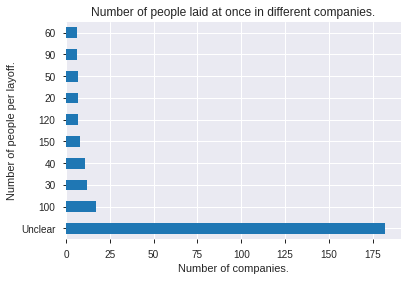

In [160]:
# Number of people laid off at once in different companies.

layoffs_data['total_layoffs'].value_counts().head(10).plot(kind = 'barh')

plt.title('Number of people laid at once in different companies.')
plt.xlabel('Number of companies.')
plt.ylabel('Number of people per layoff.')

Text(0.5, 1.0, 'Layoffs by industries')

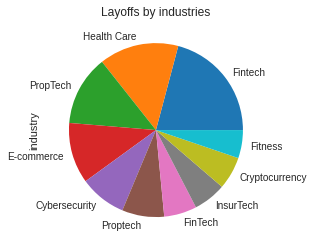

In [161]:
# Top 10  industries to conduct layoffs.

layoffs_data['industry'].value_counts().head(10).plot(kind = 'pie')

plt.title('Layoffs by industries')

In [162]:
# Total layoffs by companies in the Fintech Industry

fintech_layoffs = layoffs_data.query('industry == "FinTech"')
fintech_layoffs

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
37,Albert,20,8,2022-06-10,FinTech,Los Angeles,dot.LA,Private,NaN
57,TIFIN,21,10,2022-06-14,FinTech,Boulder,Axios,Private,NaN
73,Tipalti,123,11,2023-01-11,FinTech,San Mateo,Calcalistech,Private,NaN
133,Amount,Unclear,18,2022-06-27,FinTech,Chicago,TechCrunch,Private,NaN
196,AtoB,32,30,2022-10-19,FinTech,San Francisco,SFGate,Private,NaN
202,Bolt,250,33,2022-05-25,FinTech,San Francisco,Fortune,Private,NaN
263,Progrexion,100,Unclear,2022-06-07,FinTech,Salt Lake City,Crunchbase News,Private,NaN


Text(0, 0.5, 'Number of layoffs by companies.')

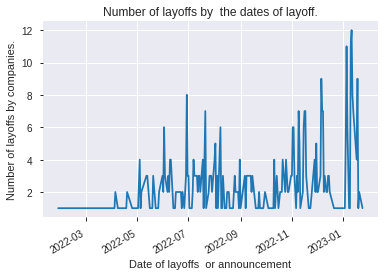

In [168]:
# Layoffs by the  dates

layoffs_data['reported_date'].value_counts().plot(kind = 'line')

plt.title('Number of layoffs by  the dates of layoff.')
plt.xlabel('Date of layoffs  or announcement')
plt.ylabel('Number of layoffs by companies.')

Text(0, 0.5, 'Number of companies with layoffs')

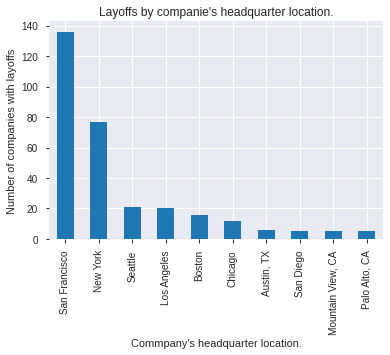

In [164]:
# Layoffs by headquarter location.

layoffs_data['headquarter_location'].value_counts().head(10).plot(kind = 'bar')

plt.title("Layoffs by companie's headquarter location.")
plt.xlabel("Commpany's headquarter location.")
plt.ylabel("Number of companies with layoffs")

Text(0.5, 1.0, 'Layoffs by nature of companies')

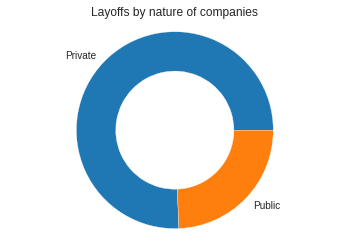

In [165]:
# Layoffs by the nature of companies.

labels = ['Private', 'Public']

fig, ax = plt.subplots()
ax.pie(layoffs_data['status'].value_counts(), labels=labels, wedgeprops=dict(width=0.4, edgecolor='w'))
ax.axis('equal')
center_circle = plt.Circle((0,0),0.2,color='white', fc='white',linewidth=0)
ax.add_artist(center_circle)

plt.title('Layoffs by nature of companies')

Text(0, 0.5, 'Number of announcements.')

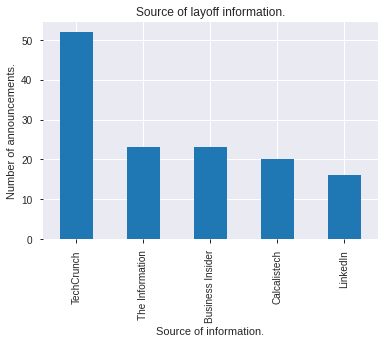

In [166]:
# Layoffs announcement platforms

layoffs_data['sources'].value_counts().head().plot(kind = 'bar')

plt.title('Source of layoff information.')
plt.xlabel('Source of information.')
plt.ylabel('Number of announcements.')

<AxesSubplot:xlabel='total_layoffs', ylabel='status'>

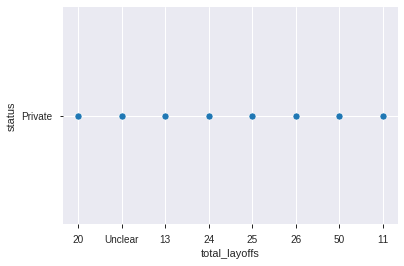

In [167]:
# Relationship between the status of the company and the total layoffs.

sns.scatterplot(y = layoffs_data['status'], x = layoffs_data['total_layoffs'].head(10))

# **Conclusion.**

1. Most of the layoffs took place in companies whose headquarters were located in  San Francisco.
2. Most of the layoffs happenned in Private companies.
3. Most of the layoffs took place in January 2023.
4. The Fintech industry experienced the highest number of layoffs.
5. The highest number of companies did not state their total number of layoffs.
6. Most of the layoff news were released by TechCrunch.